In [163]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from AI_labs import show_images
from AI_labs import learning_curve_by_history
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers

#**1. Знайомство з набором даних**

In [164]:
data=np.load('signs.npz')
X=data['X']
y=data['y']

In [165]:
X.shape, y.shape

((1405, 32, 32, 3), (1405,))

In [166]:
np.unique(y, return_counts=1)

(array(['03.Speed limit (60km/h)', '04.Speed limit (70km/h)',
        '09.No passing', '15.No vechiles'], dtype='<U23'),
 array([362, 509, 379, 155]))

Text(0.5, 1.0, '03.Speed limit (60km/h)')

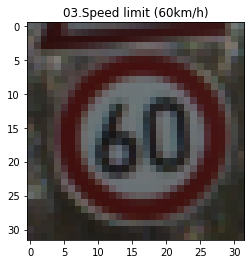

In [167]:
plt.imshow(X[9])
plt.title(y[9])

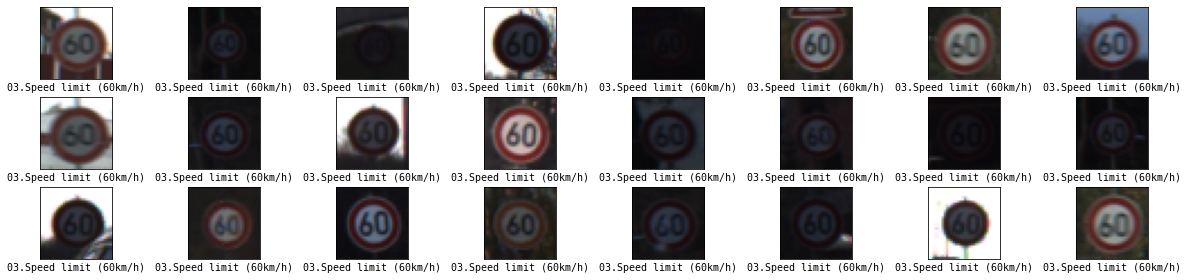

In [168]:
show_images(X,y, label_to_show='03.Speed limit (60km/h)')

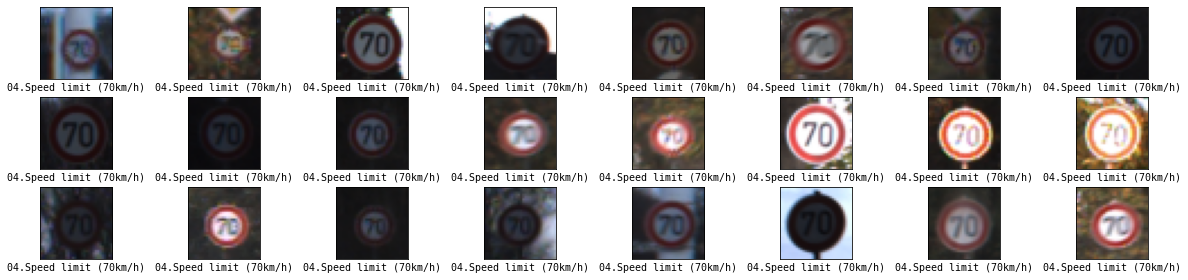

In [169]:
show_images(X,y, label_to_show='04.Speed limit (70km/h)')

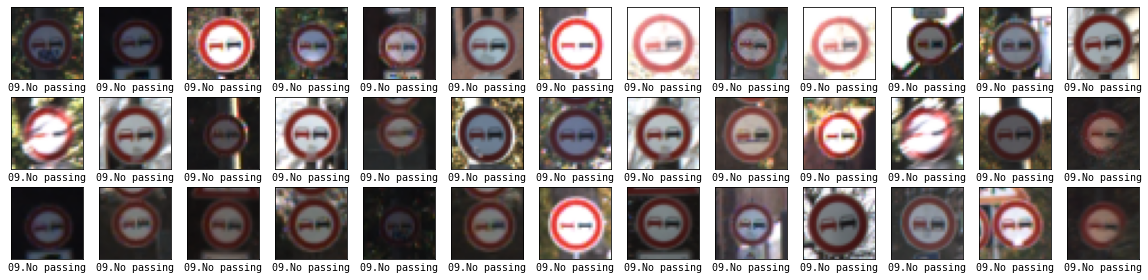

In [170]:
show_images(X,y, label_to_show='09.No passing')

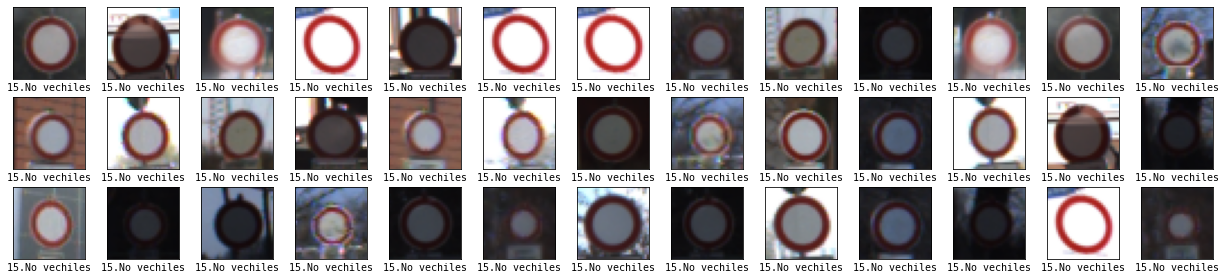

In [171]:
show_images(X,y, label_to_show='15.No vechiles')

#**2. Масштабування вхідних даних**

In [172]:
def scale(X):
  return (2/255)*X-1

In [173]:
X_scaled=scale(X)
X_scaled.min(), X_scaled.max()

(-1.0, 1.0)

#**3. Розбиття набору даних на навчальну і тестову вибірки**

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=0)

#**4. One-hot-кодування категоріальних міток класів**

In [175]:
enc=OneHotEncoder(sparse=False)
y_train_enc=enc.fit_transform(y_train.reshape(-1, 1))
y_test_enc=enc.fit_transform(y_test.reshape(-1, 1))

In [204]:
y_train.shape, y_train_enc.shape

((983,), (983, 4))

In [ ]:
(983, 1)

#**5. Створення моделі CNN**

In [205]:
model = keras.models.Sequential([
layers.Conv2D(32, 3, input_shape=(32,32,3), activation='relu'),
layers.MaxPooling2D(pool_size=(3, 3)),
layers.Conv2D(32,3, input_shape=(20,20,3), activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Flatten(),
layers.Dense(4,activation='softmax')
])
model.summary()
model.compile(loss="categorical_crossentropy", metrics="accuracy")

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 4)               

#**6. Навчання моделі**

In [202]:
%time hist=model.fit(X_train, y_train_enc, epochs=20,validation_split=0.2)

Epoch 1/20
25/25 [==============================] - 1s 13ms/step - loss: 1.1194 - accuracy: 0.4618 - val_loss: 1.0427 - val_accuracy: 0.5838
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.9249 - accuracy: 0.6387 - val_loss: 0.9165 - val_accuracy: 0.6091
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.7520 - accuracy: 0.7074 - val_loss: 0.7755 - val_accuracy: 0.7462
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6204 - accuracy: 0.7684 - val_loss: 0.6225 - val_accuracy: 0.7310
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5060 - accuracy: 0.8104 - val_loss: 0.6372 - val_accuracy: 0.7005
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4411 - accuracy: 0.8384 - val_loss: 0.4967 - val_accuracy: 0.8122
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3850 - accuracy: 0.8664 - val_loss: 0.4002 - val_accuracy: 0.8832
Epoch 8/20
25/25 [=

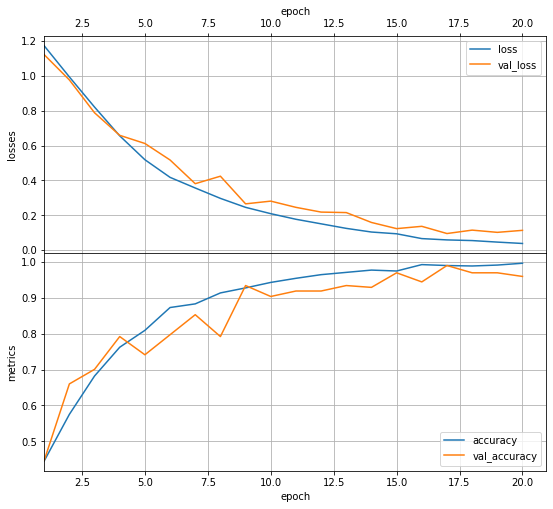

In [178]:
learning_curve_by_history(hist.history)

#**7. Використання апаратного прискорювача GPU**

In [180]:
!nvidia-smi

Wed Feb 16 16:27:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    30W /  70W |    936MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#**8. Використання методу ранньої зупинки в Keras**

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.1826 - accuracy: 0.4440 - val_loss: 1.0885 - val_accuracy: 0.5482
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.9805 - accuracy: 0.5903 - val_loss: 0.9809 - val_accuracy: 0.5381
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.8073 - accuracy: 0.6743 - val_loss: 0.8700 - val_accuracy: 0.5888
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.7519 - val_loss: 0.7221 - val_accuracy: 0.6548
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5382 - accuracy: 0.8003 - val_loss: 0.6184 - val_accuracy: 0.7310
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4393 - accuracy: 0.8397 - val_loss: 0.4794 - val_accuracy: 0.7868
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3671 - accuracy: 0.8995 - val_loss: 0.3857 - val_accuracy: 0.8274
Epoch 8/100


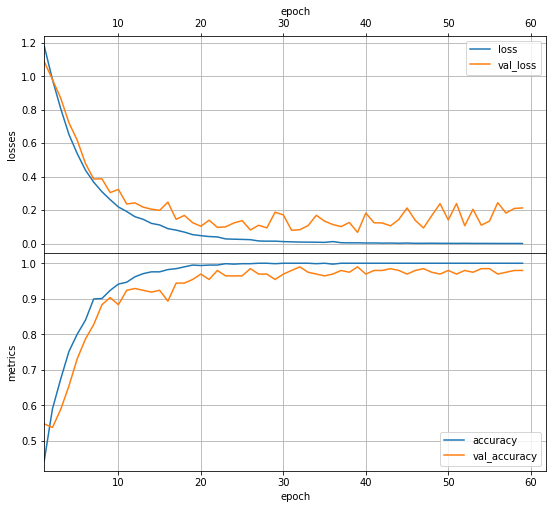

In [181]:
es = keras.callbacks.EarlyStopping(patience=20,verbose=1, restore_best_weights=True)
%time hist = model.fit(X_train, y_train_enc, epochs=100,validation_split=0.2, callbacks=[es], verbose=1)
learning_curve_by_history(hist.history)

#**9. Оцінювання побудованої моделі класифікатора**

In [207]:
model.evaluate(X_test,y_test_enc),model.evaluate(X_train,y_train_enc)

31/31 [==============================] - 0s 3ms/step - loss: 1.3826 - accuracy: 0.3520


([1.3933906555175781, 0.3412322402000427],
 [1.3826372623443604, 0.3519837260246277])

In [183]:
y_pred=model.predict(X_train)
y_pred, y_pred.shape

(array([[1.0000000e+00, 2.3746538e-10, 1.3308613e-10, 2.3501483e-12],
        [3.8455973e-08, 9.9999964e-01, 3.5303208e-07, 1.0403010e-08],
        [9.9824250e-01, 8.3166838e-04, 9.2577172e-04, 8.3763174e-10],
        ...,
        [4.9095229e-07, 9.9999952e-01, 1.3884084e-09, 1.0865391e-08],
        [6.7901119e-08, 3.1409501e-05, 1.4271269e-03, 9.9854147e-01],
        [7.1878146e-12, 9.9986672e-01, 2.1825046e-09, 1.3323313e-04]],
       dtype=float32), (983, 4))

In [184]:
y_pred=enc.inverse_transform(y_pred).flatten()
y_pred.shape, y_train.shape

((983,), (983,))

In [185]:
print(classification_report(y_train, y_pred))

                         precision    recall  f1-score   support

03.Speed limit (60km/h)       1.00      1.00      1.00       253
04.Speed limit (70km/h)       1.00      1.00      1.00       356
          09.No passing       1.00      0.99      1.00       265
         15.No vechiles       1.00      1.00      1.00       109

               accuracy                           1.00       983
              macro avg       1.00      1.00      1.00       983
           weighted avg       1.00      1.00      1.00       983



In [186]:
y_pred=model.predict(X_train)
y_pred=enc.inverse_transform(y_pred).flatten()
print(classification_report(y_train, y_pred))

                         precision    recall  f1-score   support

03.Speed limit (60km/h)       1.00      1.00      1.00       253
04.Speed limit (70km/h)       1.00      1.00      1.00       356
          09.No passing       1.00      0.99      1.00       265
         15.No vechiles       1.00      1.00      1.00       109

               accuracy                           1.00       983
              macro avg       1.00      1.00      1.00       983
           weighted avg       1.00      1.00      1.00       983



In [187]:
y_pred=model.predict(X_test)
y_pred=enc.inverse_transform(y_pred).flatten()
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

03.Speed limit (60km/h)       1.00      0.98      0.99       109
04.Speed limit (70km/h)       0.99      1.00      1.00       153
          09.No passing       0.99      1.00      1.00       114
         15.No vechiles       1.00      1.00      1.00        46

               accuracy                           1.00       422
              macro avg       1.00      1.00      1.00       422
           weighted avg       1.00      1.00      1.00       422



#**10. Додаткове завдання для самостійного виконання.**

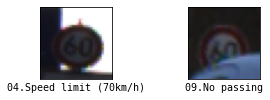

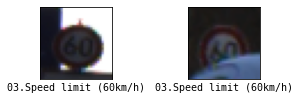

In [197]:
y_pred=model.predict(X_test)
y_pred=enc.inverse_transform(y_pred).flatten()
indices = [i for i,v in enumerate(y_pred) if y_pred[i]!=y_test[i]]
subset_of_wrongly_predicted = np.array([(255/2)*(X_test[i]+1) for i in indices]).astype(int)
subset_of_wrongly_predicted_lables = np.array([y_pred[i] for i in indices])
show_images(subset_of_wrongly_predicted,subset_of_wrongly_predicted_lables, rand=False)
show_images(subset_of_wrongly_predicted,np.array([y_test[i] for i in indices]), rand=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


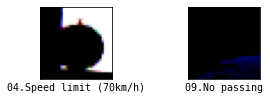

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


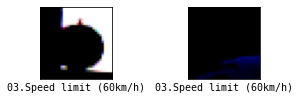

In [198]:
y_pred=model.predict(X_test)
y_pred=enc.inverse_transform(y_pred).flatten()
indices = [i for i,v in enumerate(y_pred) if y_pred[i]!=y_test[i]]
subset_of_wrongly_predicted = np.array([X_test[i] for i in indices])
subset_of_wrongly_predicted_lables = np.array([y_pred[i] for i in indices])
show_images(subset_of_wrongly_predicted,subset_of_wrongly_predicted_lables, rand=False)
show_images(subset_of_wrongly_predicted,np.array([y_test[i] for i in indices]), rand=False)